/opt/sagemath-9.3/local/lib/python3.7/site-packages/sage/all_cmdline.py:58: DeprecationWarning: the output of uniq(X) being sorted is deprecated; use sorted(set(X)) instead if you want sorted output
See https://trac.sagemath.org/27014 for details.


Average path size = 5.22900000000000 instead of 8
Min path size = 3
Max path size = 6, theoretic = 6.00000000000000
pos [3, 14]
pos [4, 10]


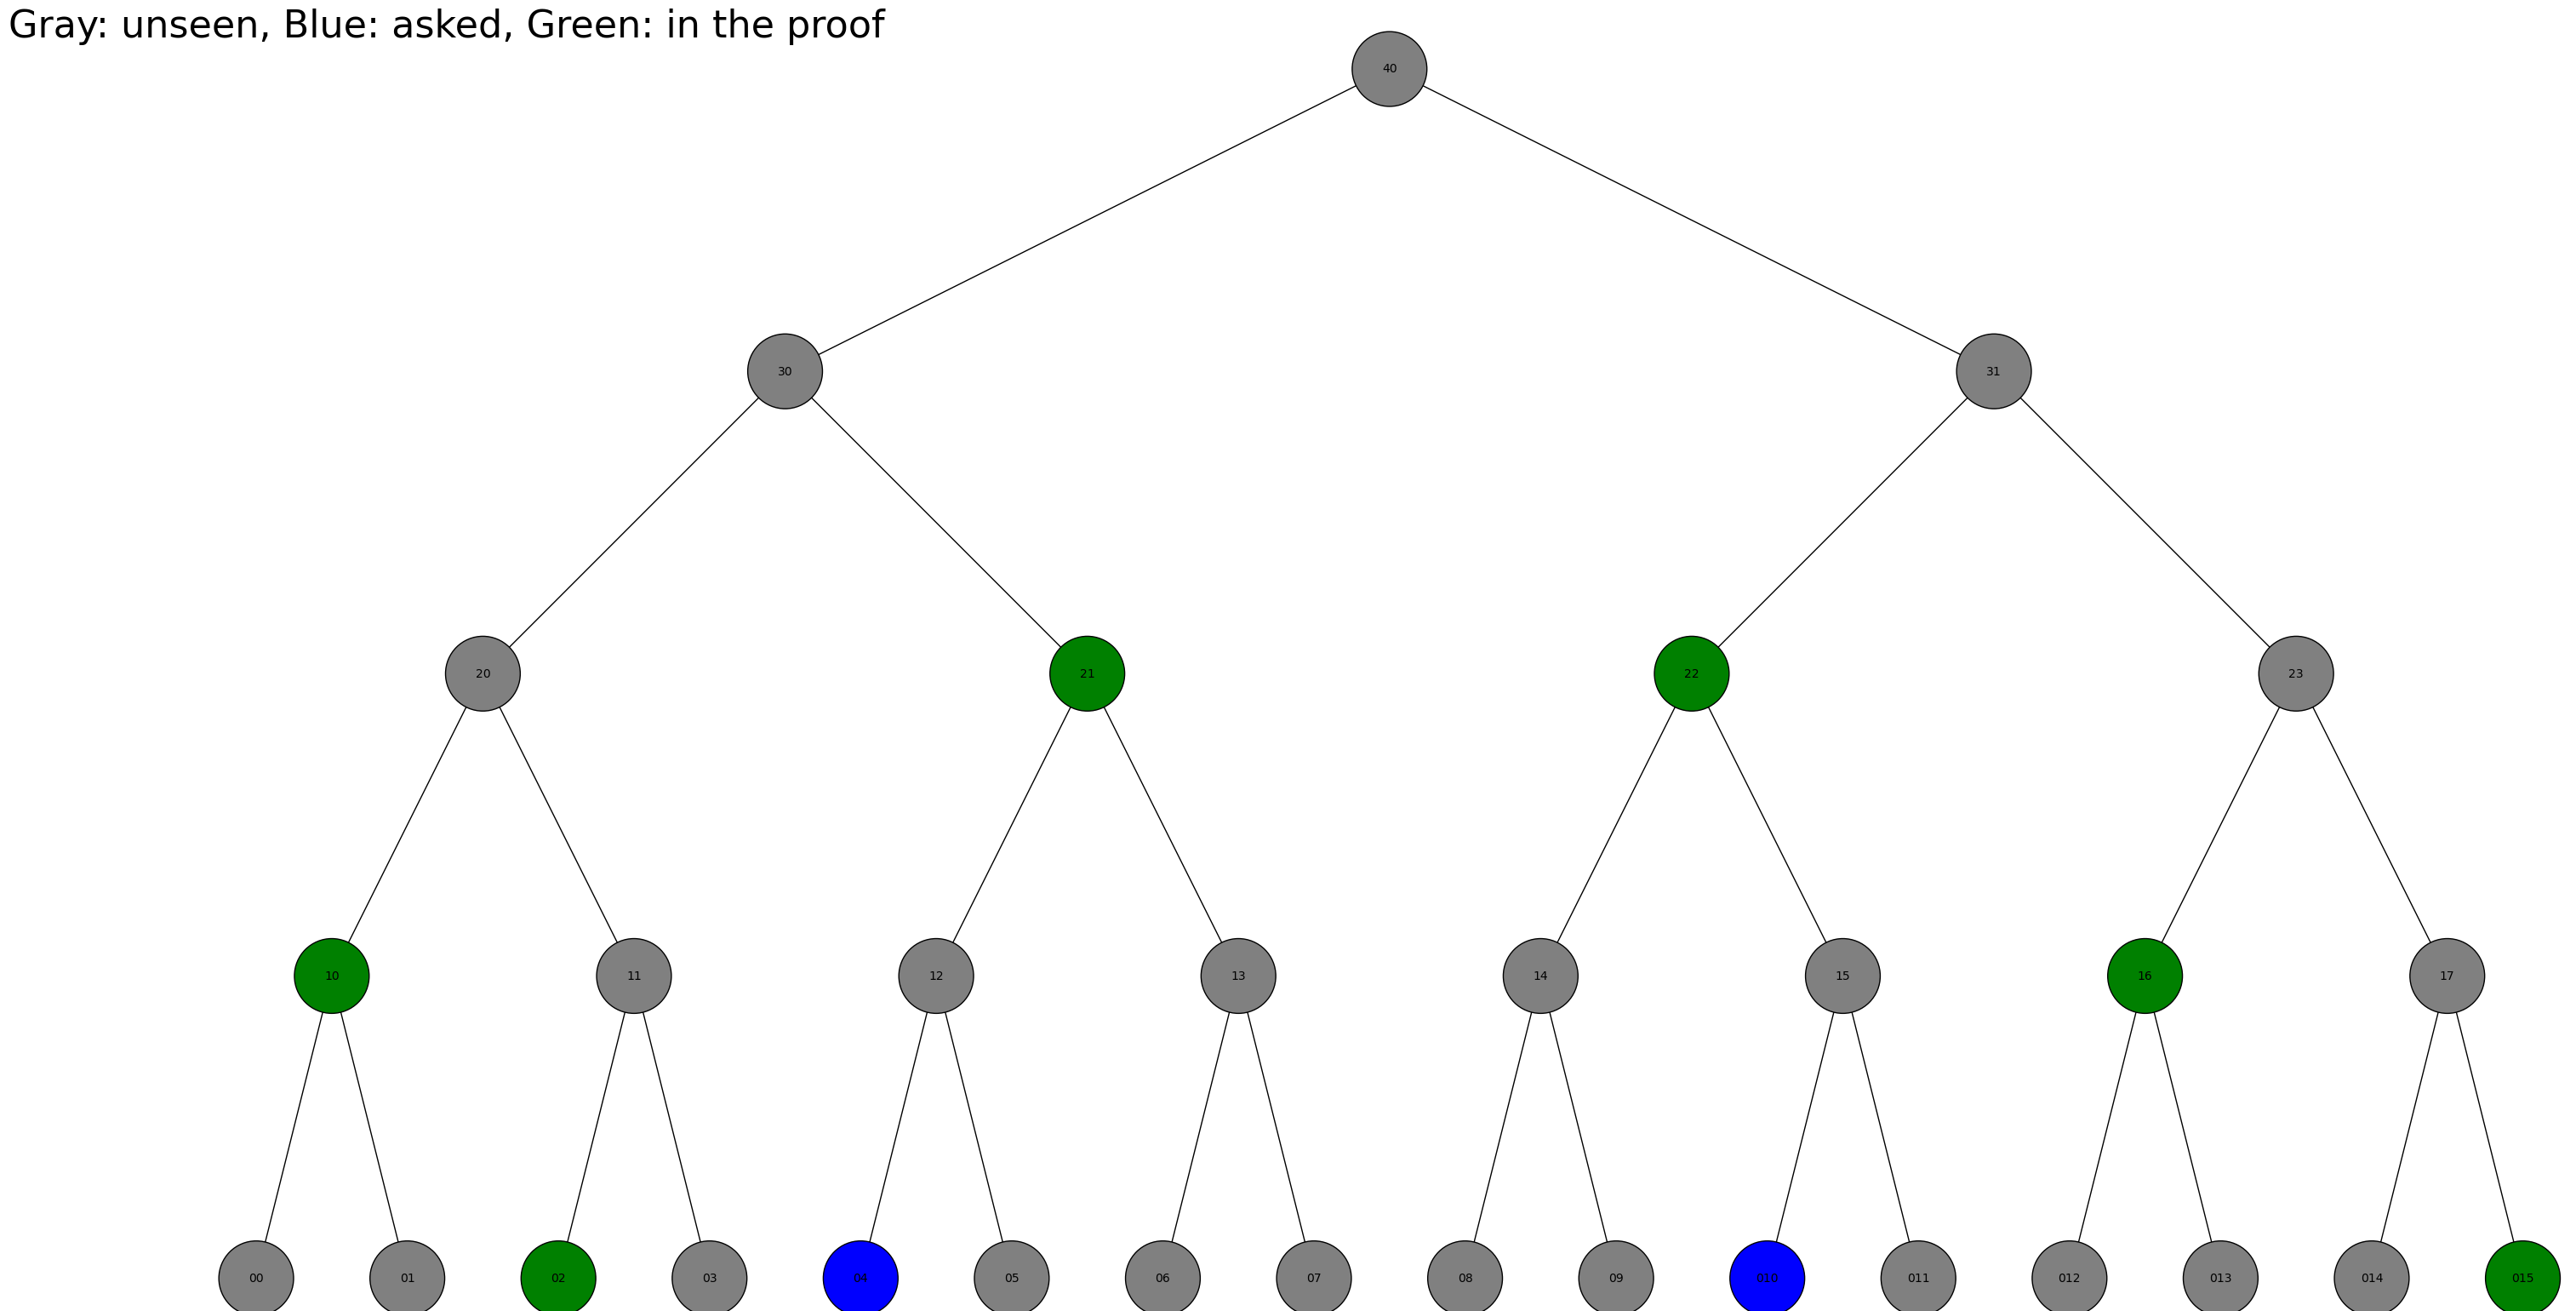

In [5]:
reset();

def log2(x):

    return log(x*1.)/log(2.);

####################################

#pos: leaf for which you want the merkle_proof (starting from 0)
#N: number of leaves in the base layer

def merkle_proof(pos,N):

    m_proof = [];
    Ns = 2^(ceil(log2(N)));

    #start from base layer
    this_pos = pos;
    for i in range(ceil(log2(N))):

        num_leaves = round(Ns/(2^i));
        val = this_pos%2;
        if val== 0:
            proof_pos = this_pos+1;
        else:
            proof_pos = this_pos-1;

        m_proof.append(str(i)+str(proof_pos));
        this_pos = floor(this_pos/2);

    return m_proof;


#pos: leaf for which you want the merkle_proof (starting from 0)
#N: number of leaves in the base layer

def common_merkle_proof(pos,N):

    m_proof = [];
    Ns = 2^(ceil(log2(N)));
            #start from base layer
    this_pos = pos;
    for i in range(ceil(log2(N))):
        new_pos = [];
        for x in this_pos:
            val = x%2;
            if val== 0:
                needed_pos = x+1;
                if needed_pos not in this_pos:
                    m_proof.append(str(i)+str(needed_pos));
            else:
                needed_pos = x-1;
                if needed_pos not in this_pos:
                    m_proof.append(str(i)+str(needed_pos));
            new_pos.append(floor(x/2));


        this_pos = uniq(new_pos);

    return m_proof;

###########################
tree_size = 16 #choose as a power of 2
num_proof = 2;

num_test = 1000;
min_val = tree_size;
max_val = 0;
ave_val = 0;

fig_size = 28;
N = tree_size;

worst_case = 1;

worst_pos = [];
worst_proof = [];

for i in range(num_test):
    leaves_pos = Combinations(tree_size, num_proof).random_element();
    proofs = common_merkle_proof(leaves_pos,tree_size);
    if len(proofs)>max_val:
        max_val = len(proofs);
        worst_pos = leaves_pos;
        worst_proof = proofs;
    if len(proofs)<min_val:
        min_val = len(proofs);
    ave_val += len(proofs);

print("Average path size = "+str(ave_val*1./num_test)+" instead of "+str(round(log2(tree_size))*num_proof));
print("Min path size = "+str(min_val));
print("Max path size = "+str(max_val)+", theoretic = "+str(num_proof*log2(tree_size/num_proof)));


#print worst case
if worst_case:
    leaves_pos = worst_pos;
    proofs = worst_proof;

#creating pos for graph
x_values = range(0,2*tree_size*tree_size,2*tree_size);
pos = {};
for ell in range(ceil(log2(tree_size))+1):
#     starting_pos = ell/2;
    dist_nodes = tree_size/(2^ell);
    pos.update(dict((str(ell)+str(i),[fig_size*x_values[i], 2*fig_size*2*tree_size*ell]) for i in range(round(tree_size/(2^ell)))));
    new_x_values = [];
    if len(x_values)>1:
        for j in range(round(tree_size/(2^(1+ell)))):
            new_val = (x_values[2*j]+x_values[2*j+1])/2;
            new_x_values.append(new_val);
    else:
        new_x_values = [0];

    x_values = new_x_values;

  #pos.update(dict((str(ell)+str(i),[-i*dist_nodes+tree_size/(2^ell), 2*tree_size*ell]) for i in range(round(tree_size/(2^ell)))));

#creating tree(nodes and edges)
tree = {};
colors = [];
print("pos", leaves_pos)
leaves_pos=[4, 10]
print("pos", leaves_pos)
for ell in range(ceil(log2(tree_size))):
    for i in range(round(tree_size/(2^ell))):
        upper_val = floor(i/2);
        tree.update({str(ell)+str(i): [str(ell+1)+str(upper_val)]});
        if ell == 0:
            if i in leaves_pos:
                colors.append('blue');
            else:
                if '0'+str(i) in proofs:
                    colors.append('green');
                else:
                    colors.append('gray');
        else:
            if str(ell)+str(i) in proofs:
                colors.append('green');
            else:
                colors.append('gray');

colors.append('gray');

g = Graph(tree);

#adding edges
#m_proof = proofs;
#for i in range(len(m_proof)-1):
#     g.add_edge((m_proof[i], m_proof[i+1], 'a'));

#a = g.graphplot(pos=pos, color_by_label=False, figsize = [fig_size,2*fig_size], vertex_size = 2000*32/N, vertex_colors=colors, title ='Gray: recomputed locally, Blue: asked, Green: in the proof', title_pos = [0.1, 2*fig_size*2*tree_size*ceil(log2(tree_size))+1 ], fontsize = 32).plot()
a = g.graphplot(pos=pos, color_by_label=False, figsize = [fig_size,2*fig_size], vertex_size = 2000*32/N, vertex_colors=colors, title ='Gray: unseen, Blue: asked, Green: in the proof', title_pos = [0.1, 2*fig_size*2*tree_size*ceil(log2(tree_size))+1 ], fontsize = 32).plot()
a.show();
 #2,3,5,8,9,12,13,16,17,19,20,21,22,23,25,26,28,32,33,35,38,42,44,47,49,52,54,55,60,61